In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
#cross validation
from sklearn.model_selection import train_test_split

In [3]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import neighbors

C:\Users\heyda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from sklearn.decomposition import PCA

In [5]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import sqrt

In [6]:
#upload the dataset
housedf=pd.read_csv('kc_house_data.csv',header=0)

In [7]:
#check the first five rows
housedf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#get the statistical information
housedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#get the information about the data types' of the columns
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [10]:
#delete the first ID and date columns
housedf.drop(columns=['id','date'],axis=1, inplace=True)

In [11]:
housedf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
#check the missing value in dataset
housedf.isnull().values.any()

False

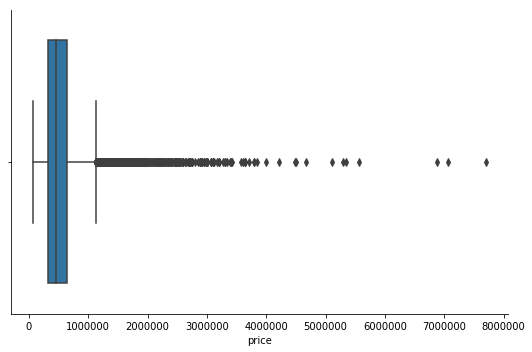

In [13]:
#price column distribution in dataset, get to know its median, min, max and outliers with the help of box plot
priceplt = sns.catplot('price', data=housedf, kind='box', aspect=1.5)
priceplt.set_xlabels('price')

In [14]:
#columns in datasets
header = housedf.dtypes.index
print(header)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


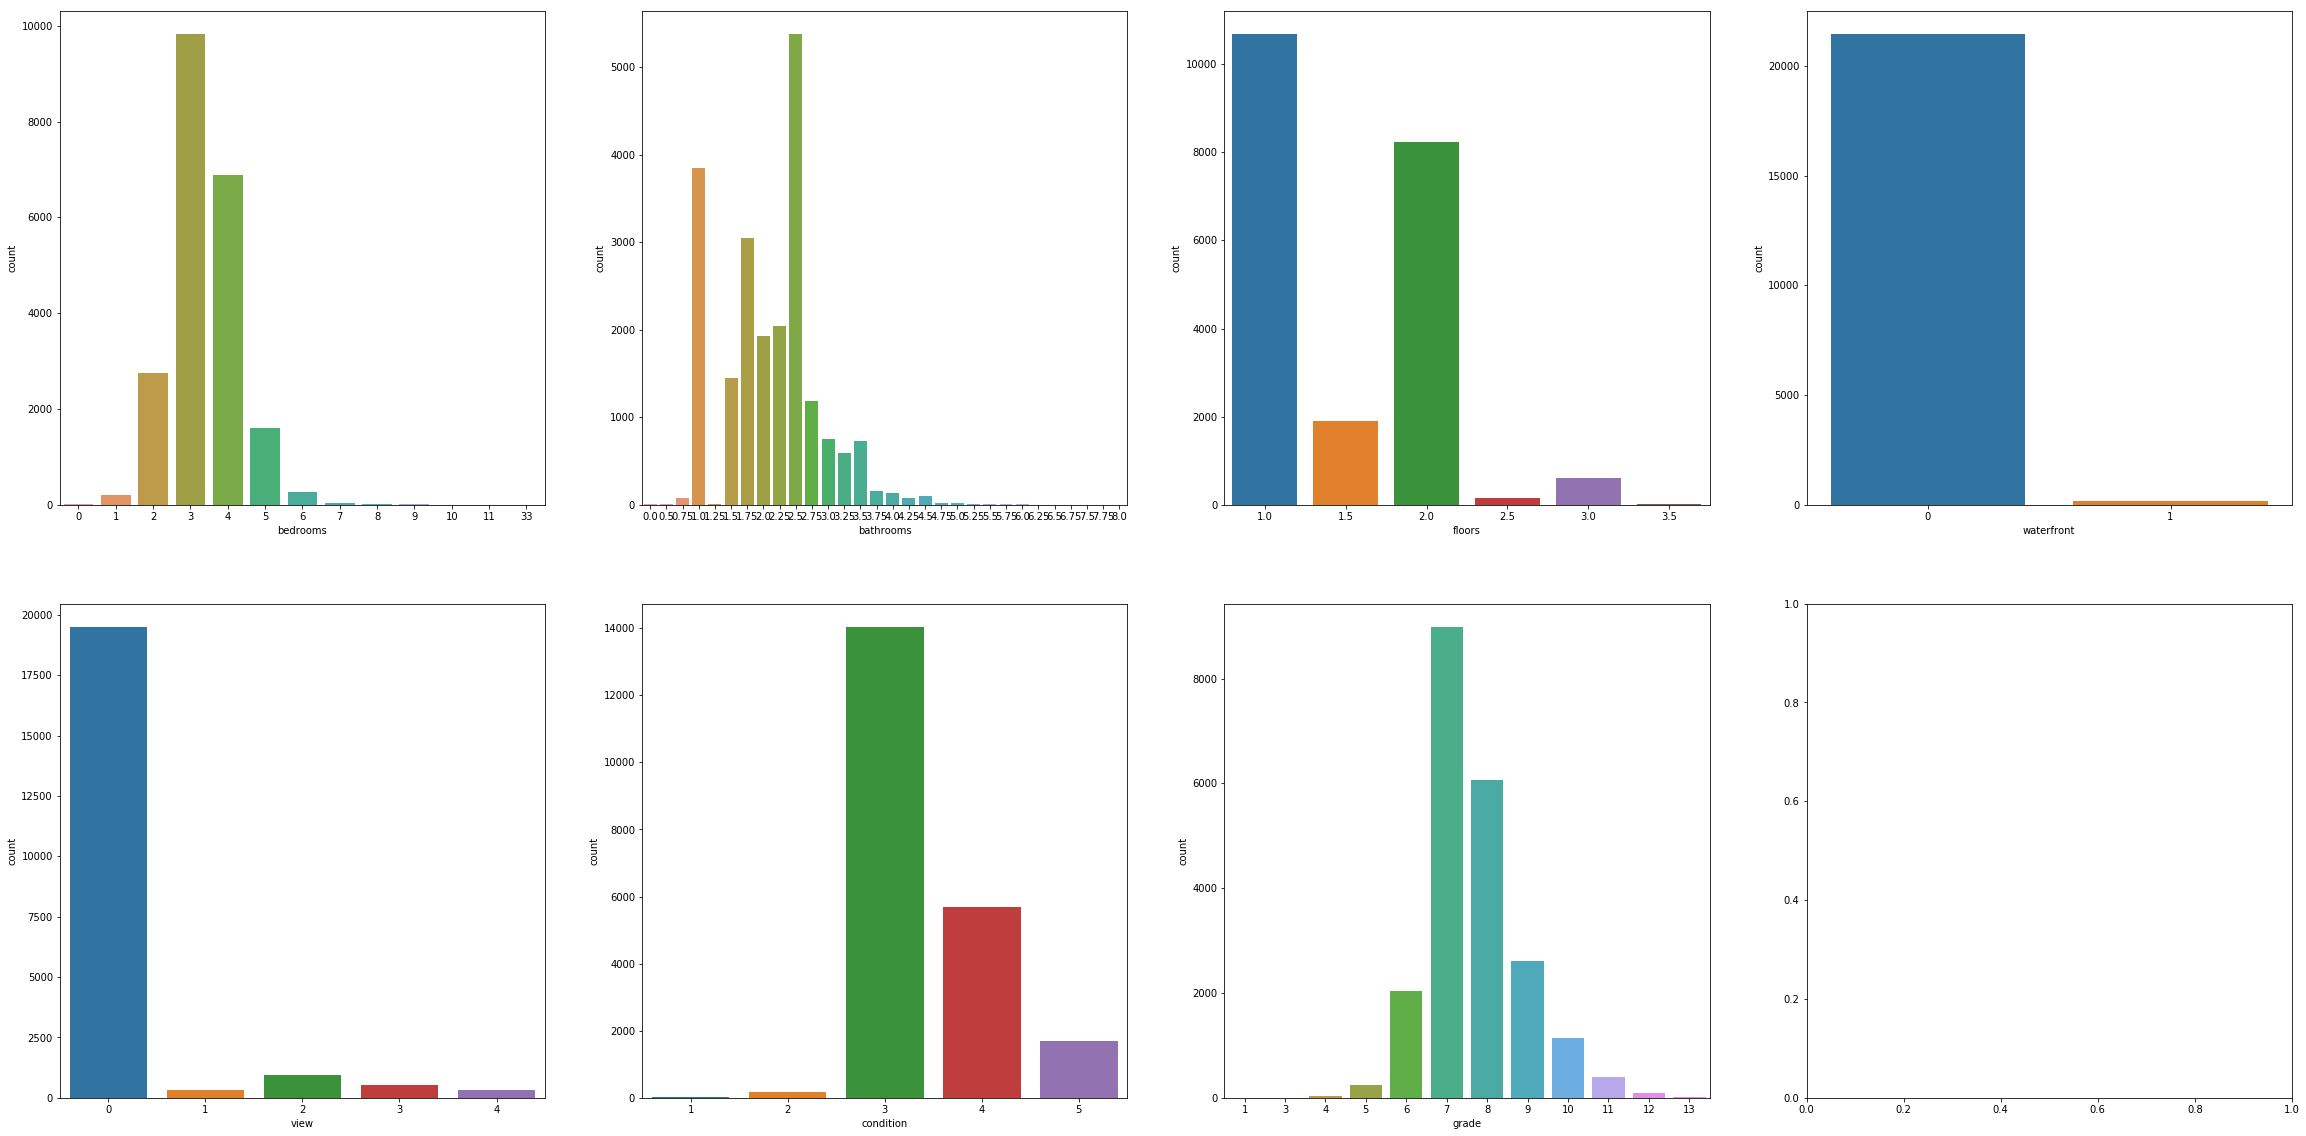

In [15]:
#distribution of some features in dataset
ig, axarr  = plt.subplots(2,4,figsize=(40,20))

sns.countplot(x='bedrooms', data=housedf, ax=axarr[0,0])
sns.countplot(x='bathrooms', data=housedf, ax=axarr[0,1])
sns.countplot(x='floors', data=housedf, ax=axarr[0,2])
sns.countplot(x='waterfront', data=housedf, ax=axarr[0,3])
sns.countplot(x='view', data=housedf, ax=axarr[1,0])
sns.countplot(x='condition', data=housedf, ax=axarr[1,1])
sns.countplot(x='grade', data=housedf, ax=axarr[1,2])



In [16]:
#levels'percentage in each of these features 
print('Parcentage',housedf.bedrooms.value_counts(normalize=True))

Parcentage 3     0.454541
4     0.318419
2     0.127701
5     0.074076
6     0.012585
1     0.009207
7     0.001758
8     0.000601
0     0.000601
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64


In [17]:
print('Parcentage',housedf.bathrooms.value_counts(normalize=True))


Parcentage 2.50    0.248924
1.00    0.178226
1.75    0.141026
2.25    0.094712
2.00    0.089298
1.50    0.066904
2.75    0.054828
3.00    0.034840
3.50    0.033822
3.25    0.027252
3.75    0.007172
4.00    0.006293
4.50    0.004627
4.25    0.003655
0.75    0.003331
4.75    0.001064
5.00    0.000972
5.25    0.000601
0.00    0.000463
5.50    0.000463
1.25    0.000416
6.00    0.000278
0.50    0.000185
5.75    0.000185
8.00    0.000093
6.25    0.000093
6.50    0.000093
6.75    0.000093
7.50    0.000046
7.75    0.000046
Name: bathrooms, dtype: float64


In [18]:
print('Parcentage',housedf.floors.value_counts(normalize=True))

Parcentage 1.0    0.494147
2.0    0.381298
1.5    0.088373
3.0    0.028363
2.5    0.007449
3.5    0.000370
Name: floors, dtype: float64


In [19]:
print('Parcentage',housedf.waterfront.value_counts(normalize=True))

Parcentage 0    0.992458
1    0.007542
Name: waterfront, dtype: float64


In [20]:
print('Parcentage',housedf.view.value_counts(normalize=True))

Parcentage 0    0.901726
2    0.044557
3    0.023597
1    0.015361
4    0.014760
Name: view, dtype: float64


In [21]:
print('Parcentage',housedf.condition.value_counts(normalize=True))

Parcentage 3    0.649193
4    0.262759
5    0.078703
2    0.007958
1    0.001388
Name: condition, dtype: float64


In [22]:
print('Parcentage',housedf.grade.value_counts(normalize=True))

Parcentage 7     0.415537
8     0.280757
9     0.120992
6     0.094295
10    0.052468
11    0.018461
5     0.011197
12    0.004164
4     0.001342
13    0.000601
3     0.000139
1     0.000046
Name: grade, dtype: float64


In [23]:
#get the statistical information of price
housedf.price.mean()

540088.1417665294

In [24]:
housedf.price.max()

7700000.0

In [25]:
housedf.price.min()

75000.0

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


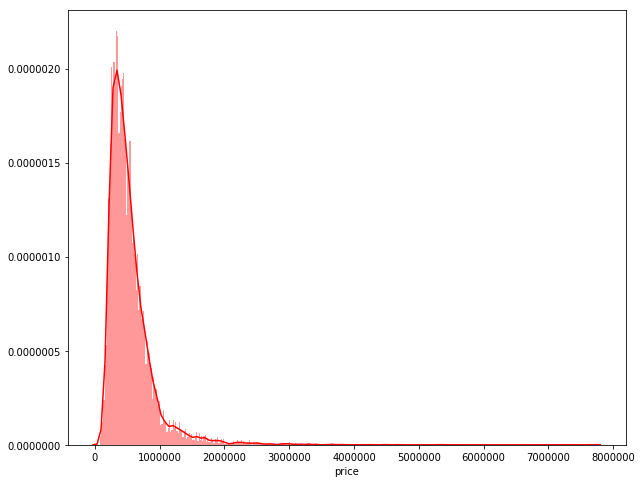

In [26]:
#use different plot to see how the housing price is distributed
print(housedf['price'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(housedf['price'], color='r', bins=400, hist_kws={'alpha': 0.4});

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


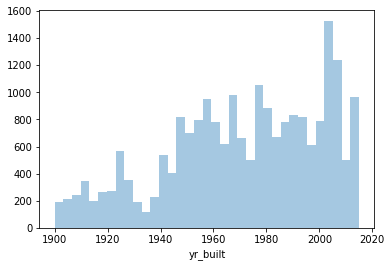

In [27]:
#plot the numerical features 
sns.distplot(housedf['yr_built'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


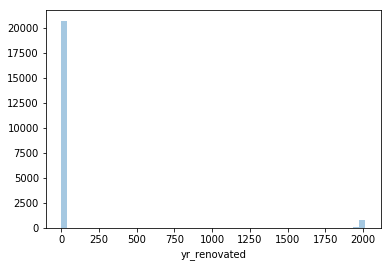

In [28]:
sns.distplot(housedf['yr_renovated'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


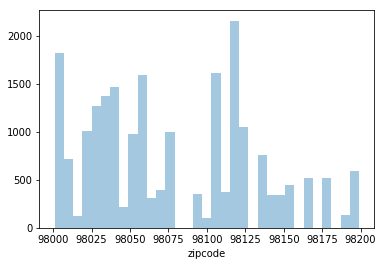

In [29]:
sns.distplot(housedf['zipcode'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


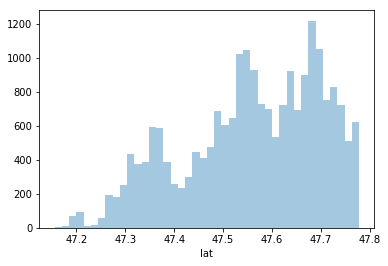

In [30]:
sns.distplot(housedf['lat'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


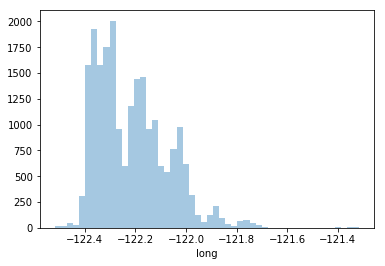

In [31]:
sns.distplot(housedf['long'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


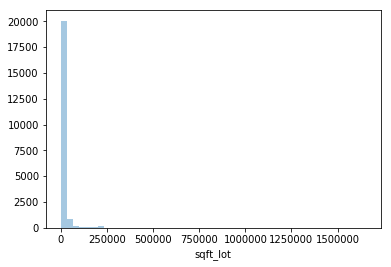

In [32]:
sns.distplot(housedf['sqft_lot'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


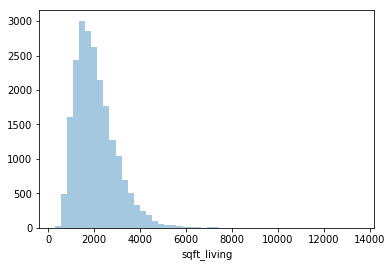

In [33]:
sns.distplot(housedf['sqft_living'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


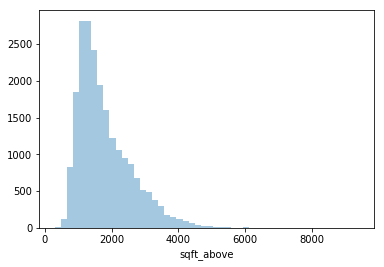

In [34]:
sns.distplot(housedf['sqft_above'], kde=False)

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


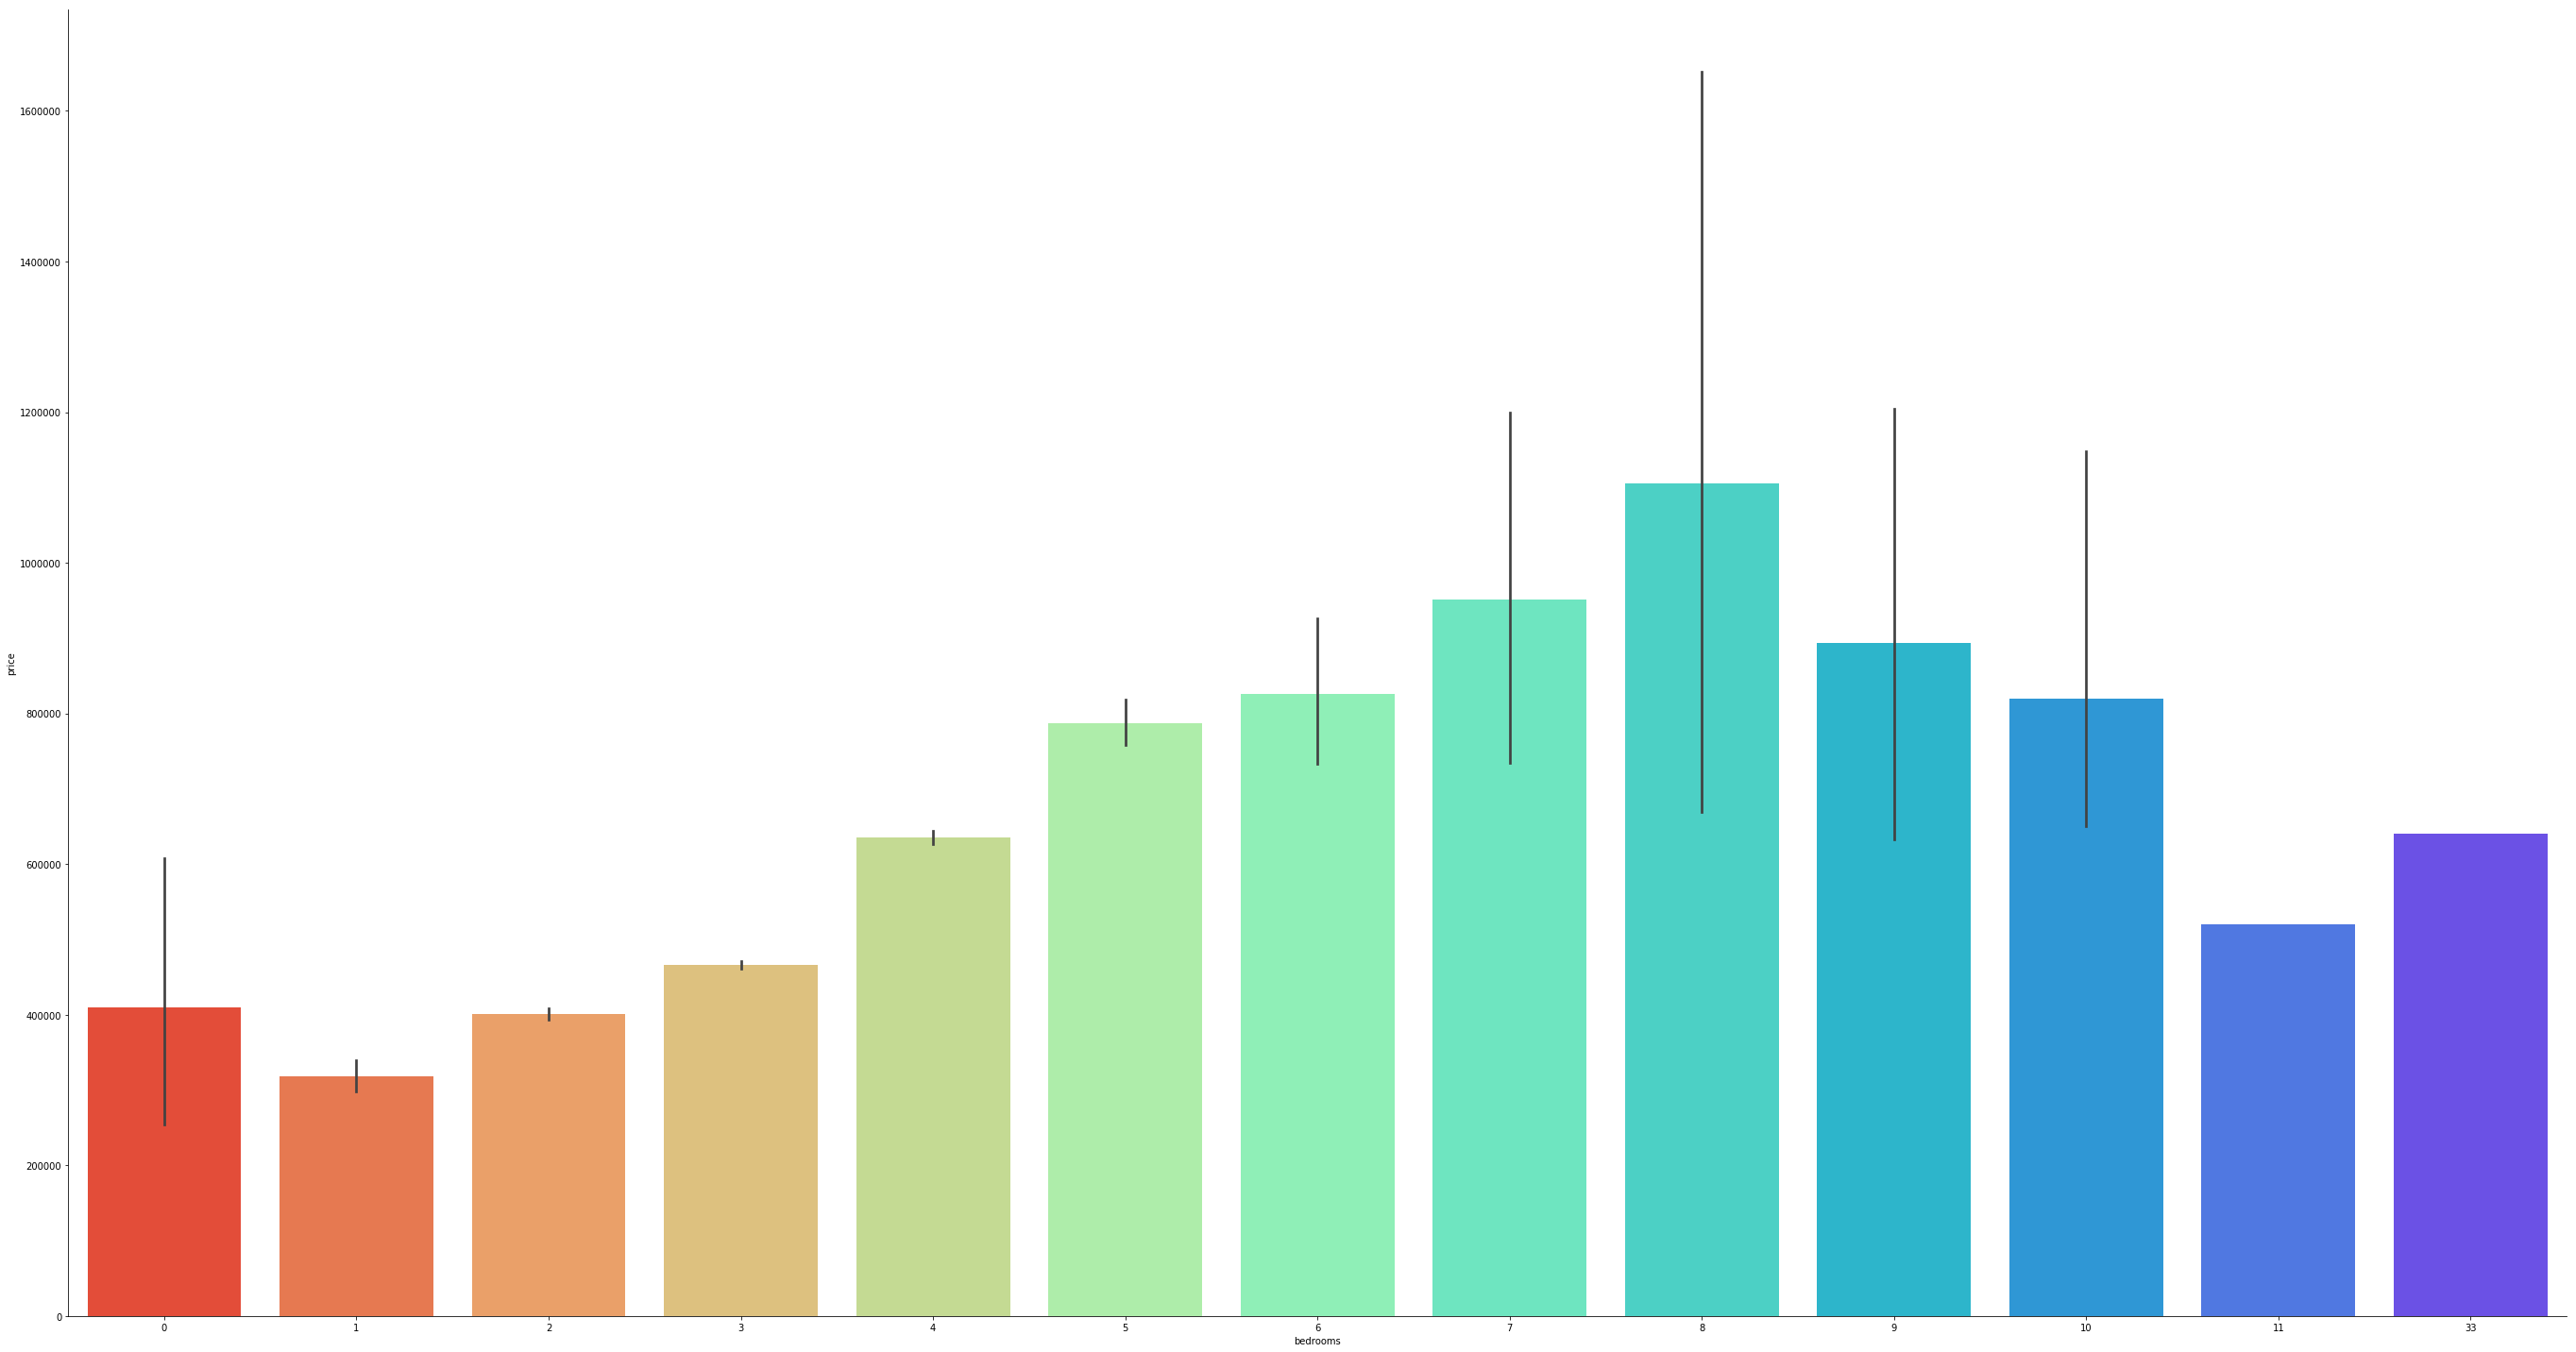

In [35]:
#to see which factor in features increase the price of house
sns.factorplot(x="bedrooms", y="price", data= housedf, kind="bar", size=20, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


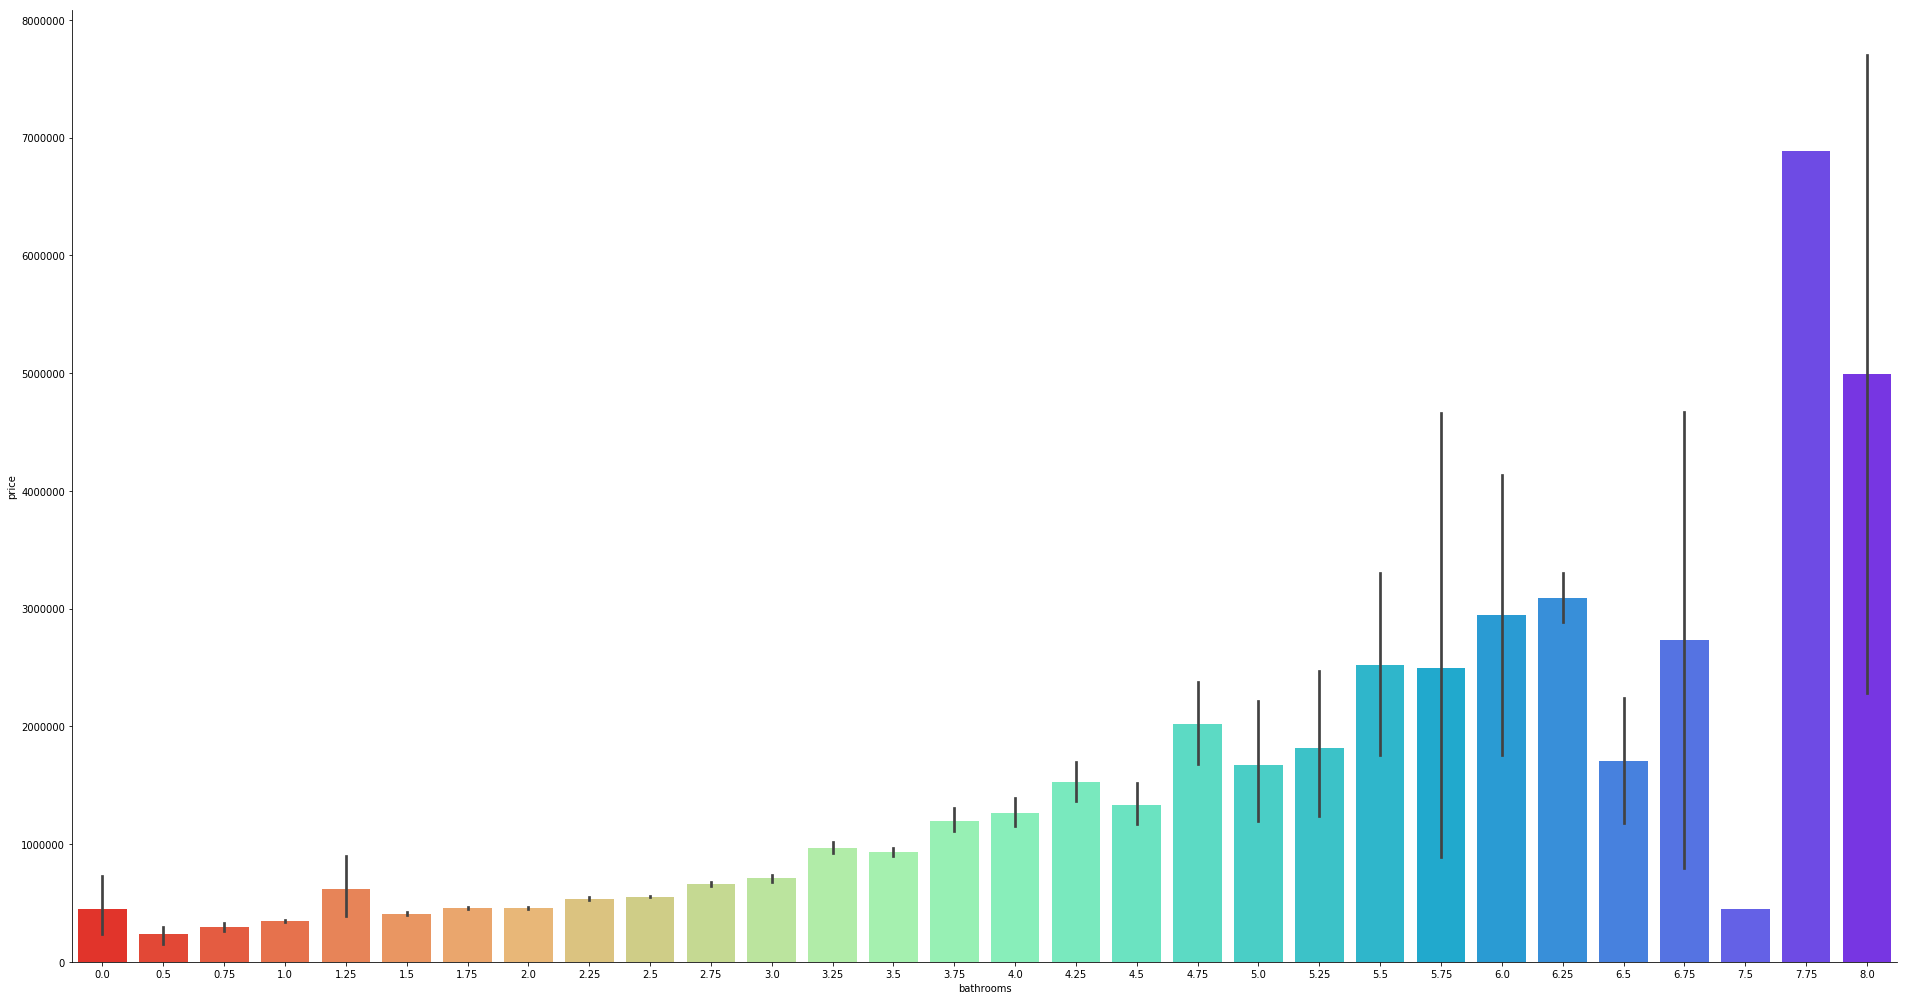

In [36]:
sns.factorplot(x="bathrooms", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')


C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


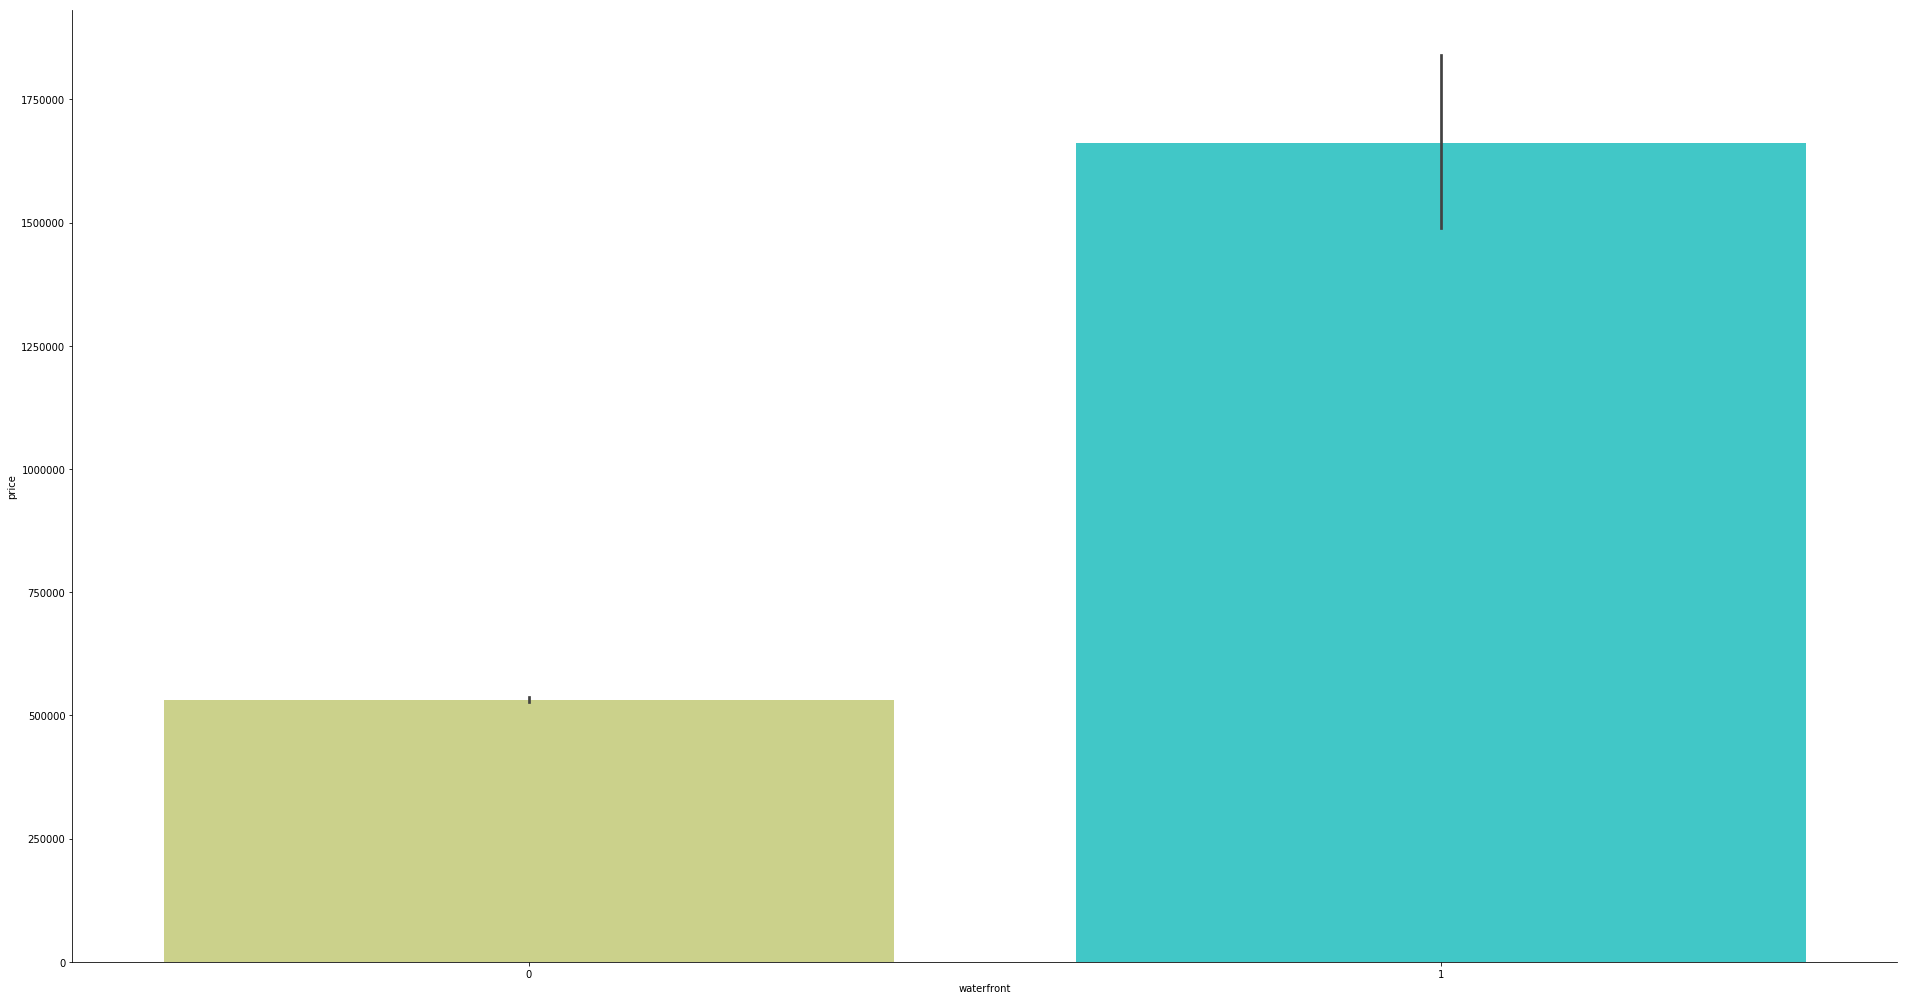

In [37]:
sns.factorplot(x="waterfront", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


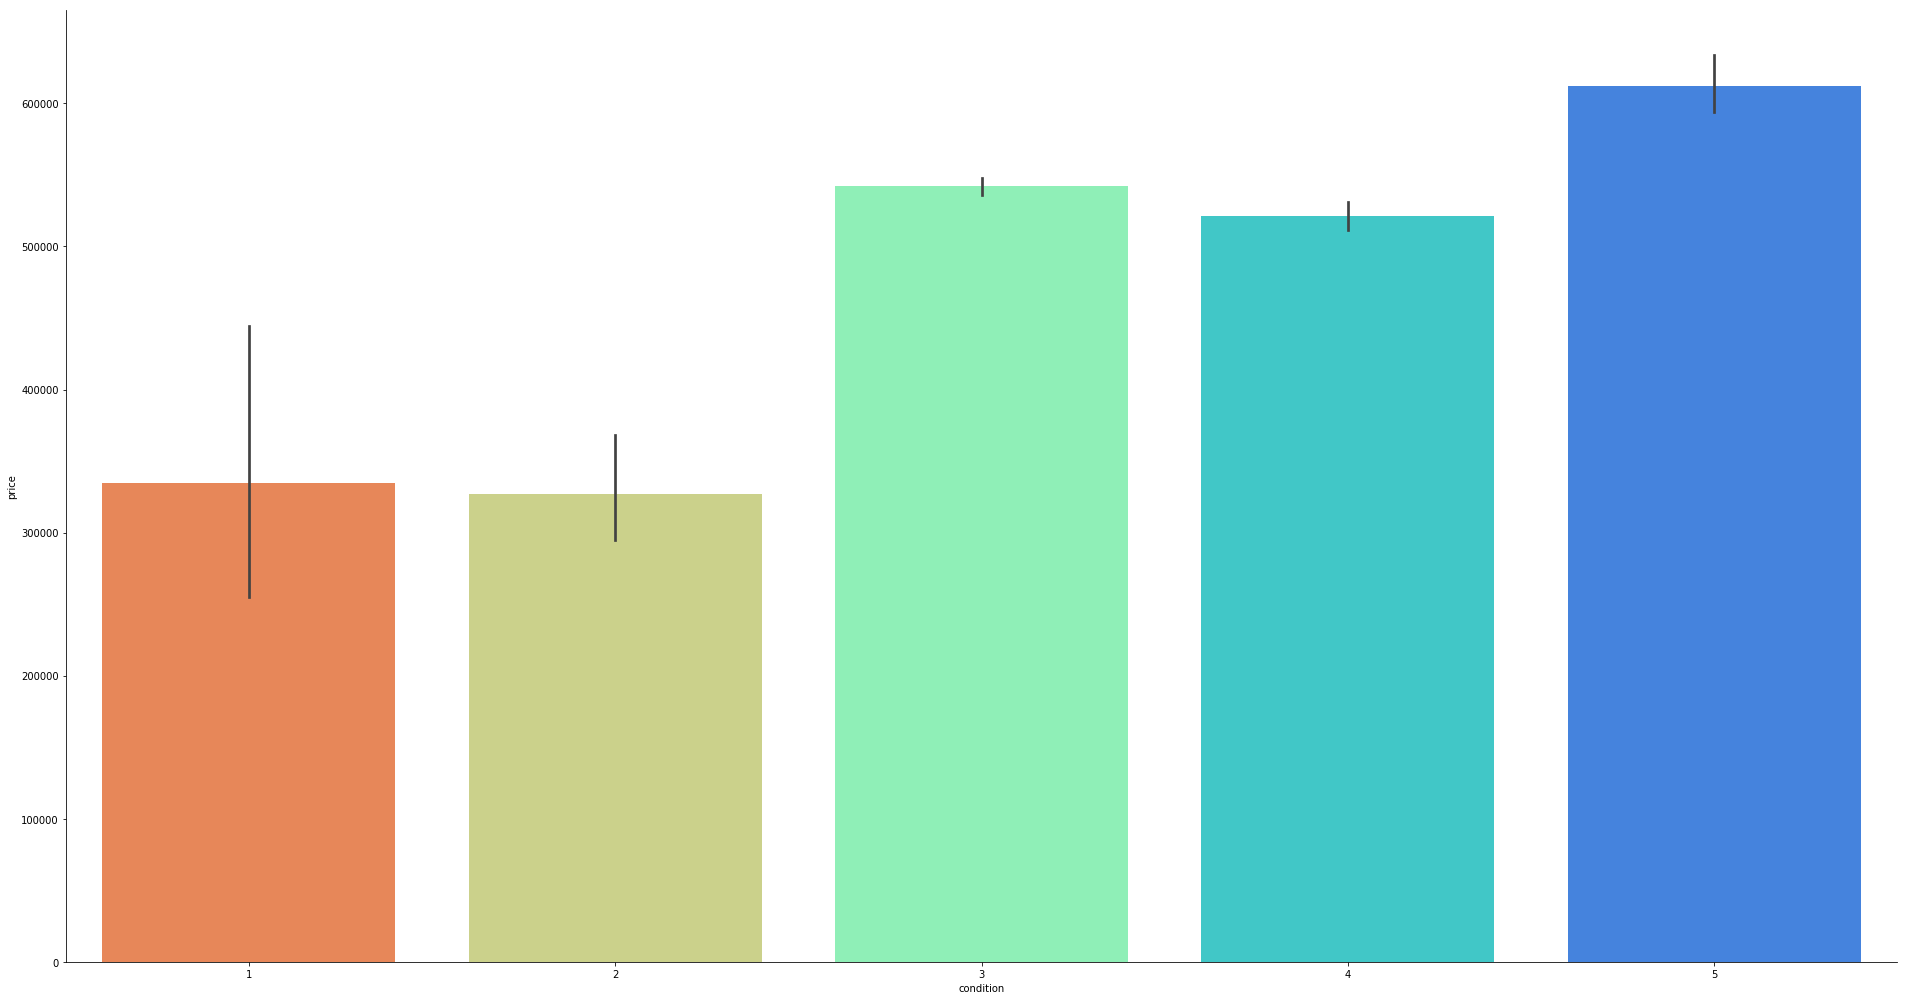

In [38]:
sns.factorplot(x="condition", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


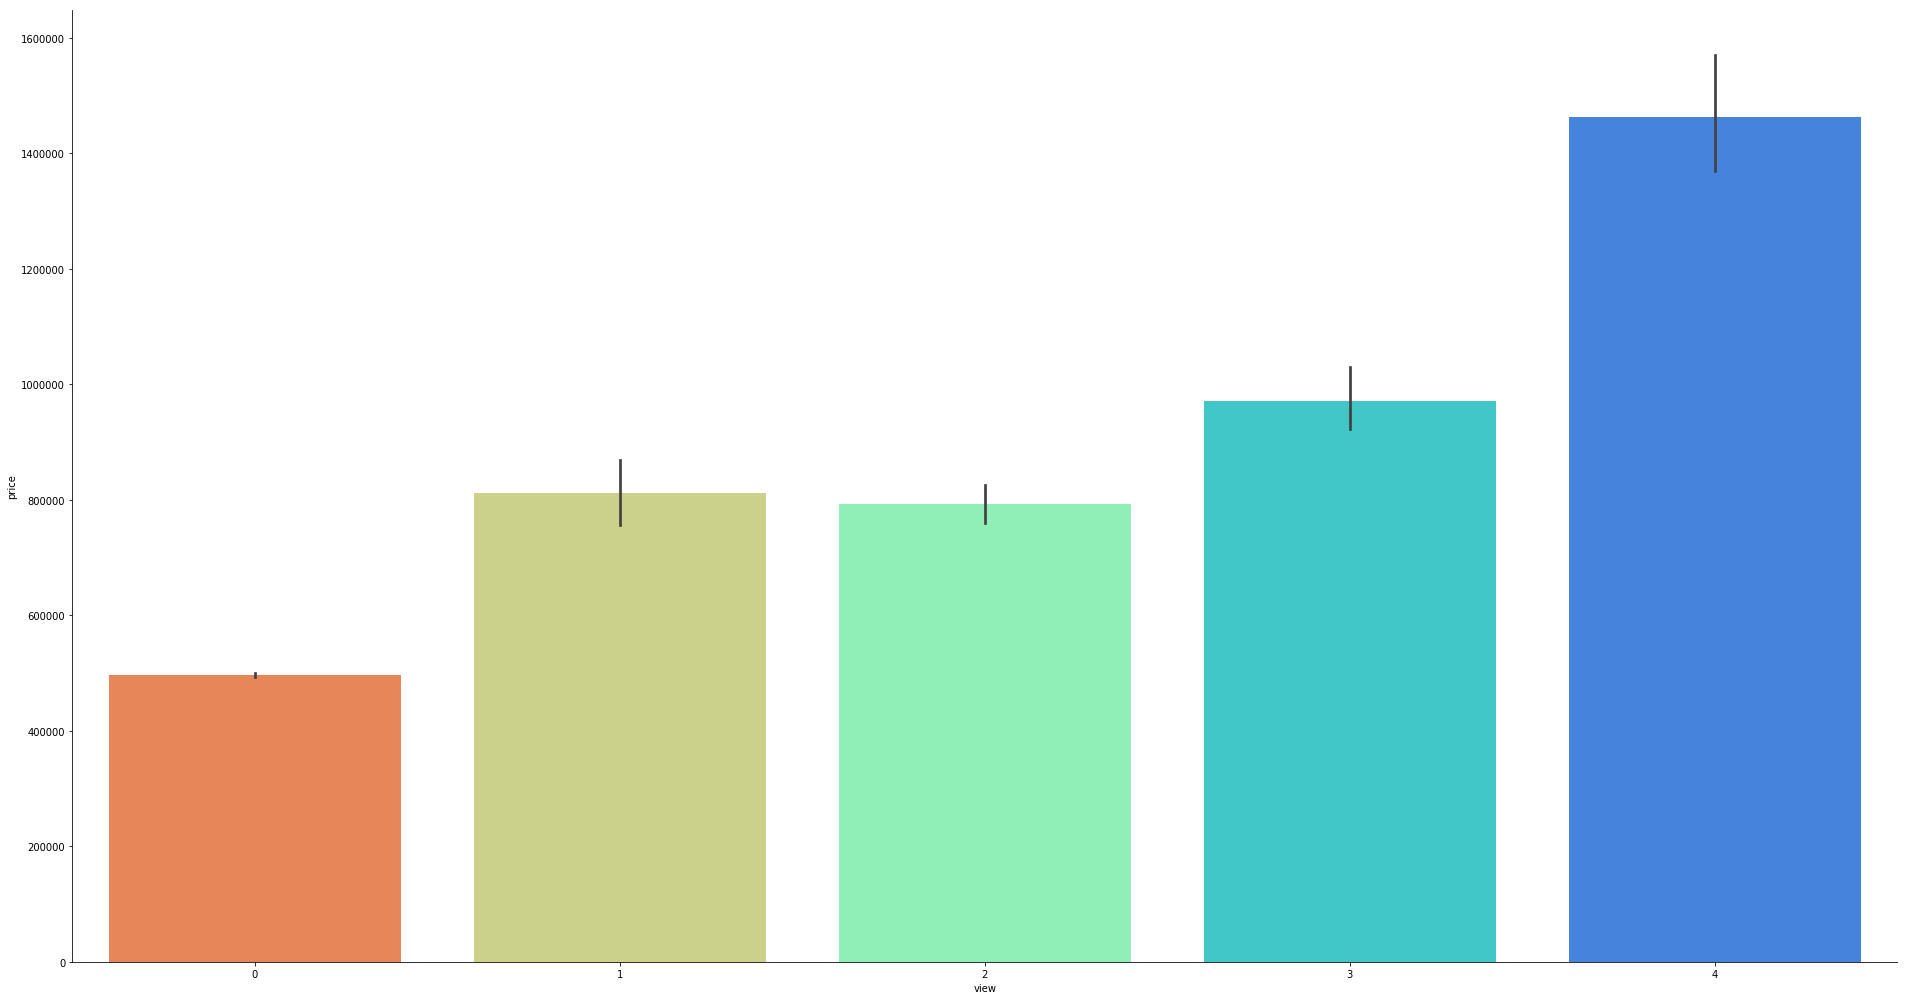

In [39]:
sns.factorplot(x="view", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


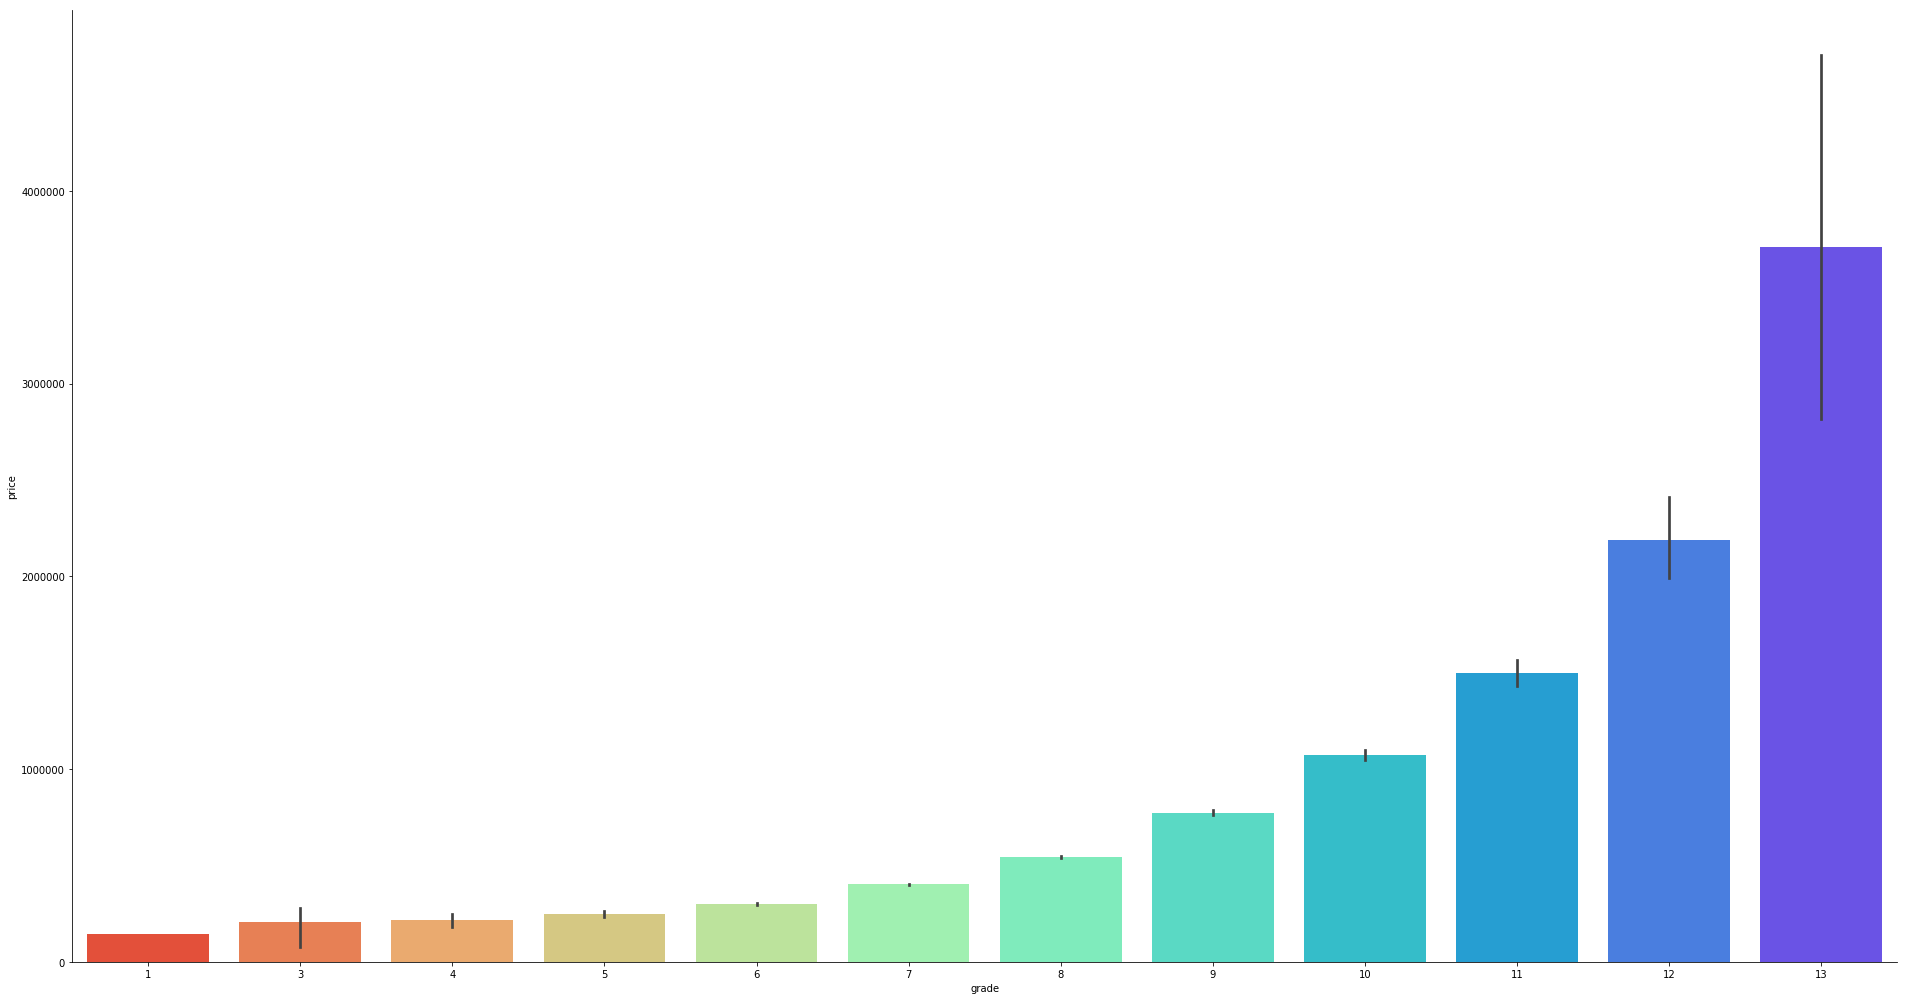

In [40]:
sns.factorplot(x="grade", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


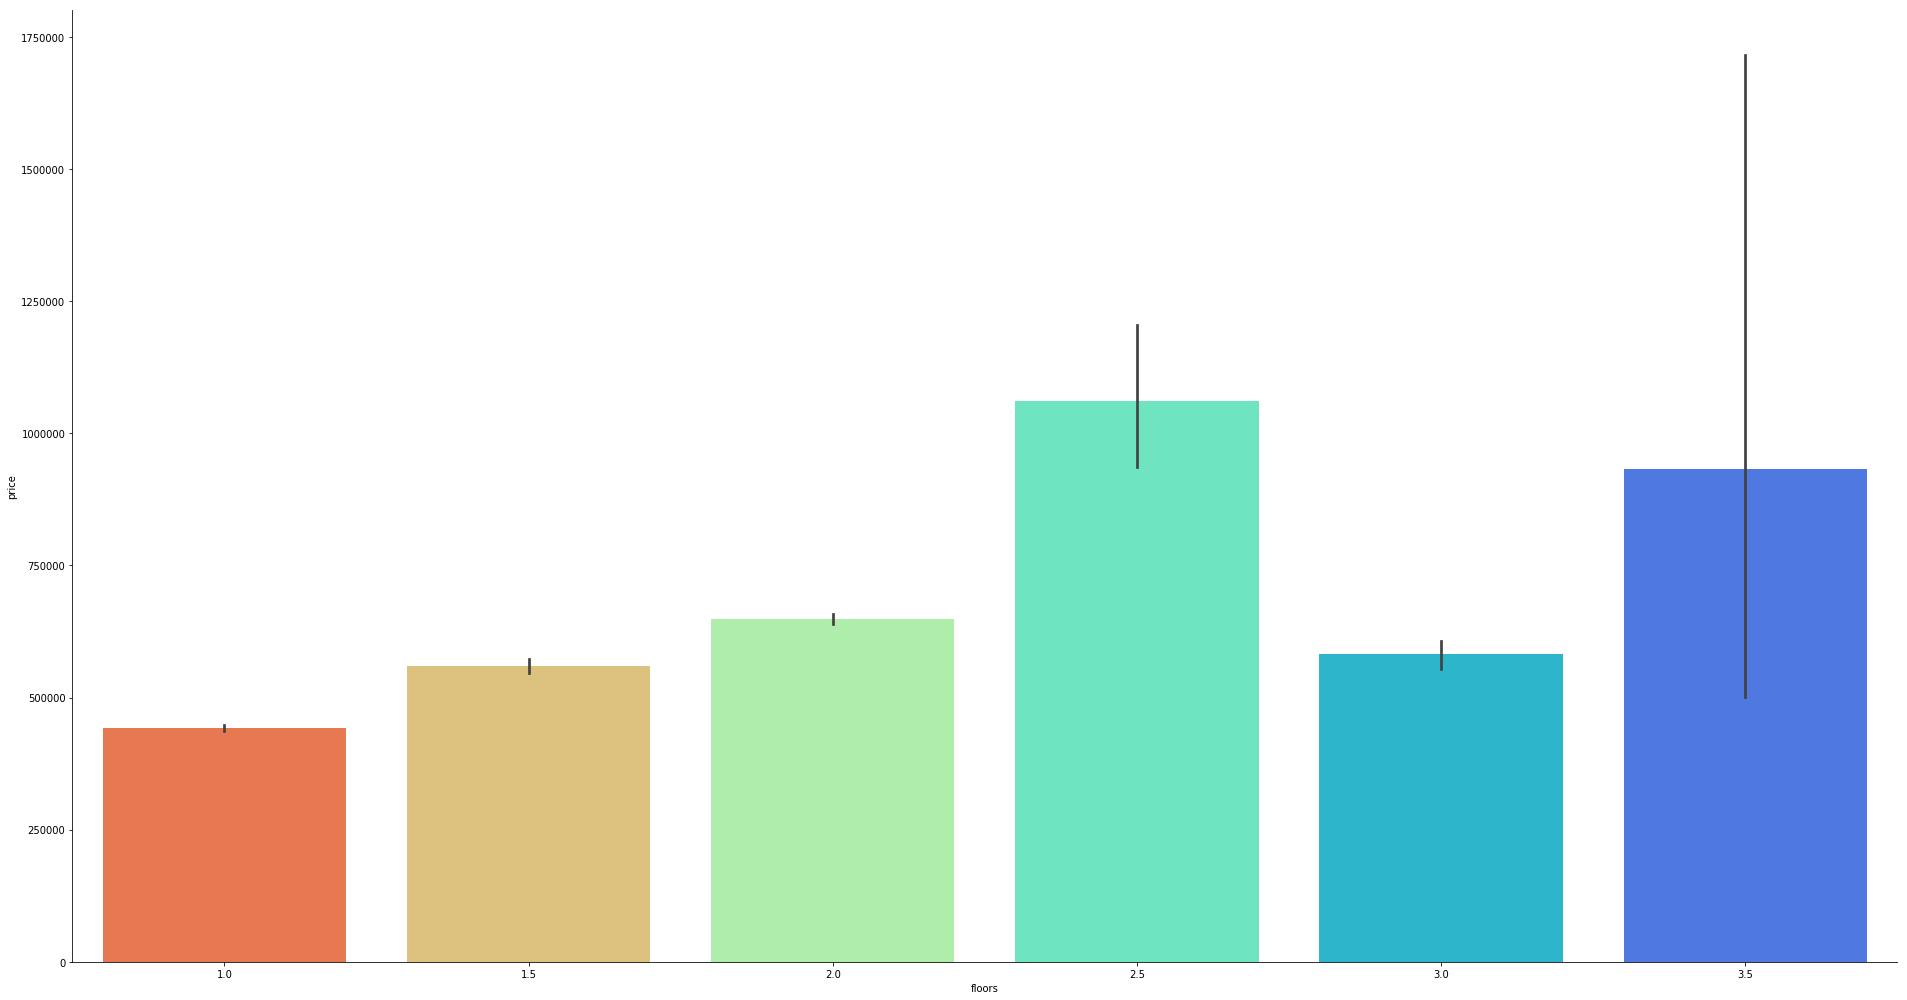

In [41]:
sns.factorplot(x="floors", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


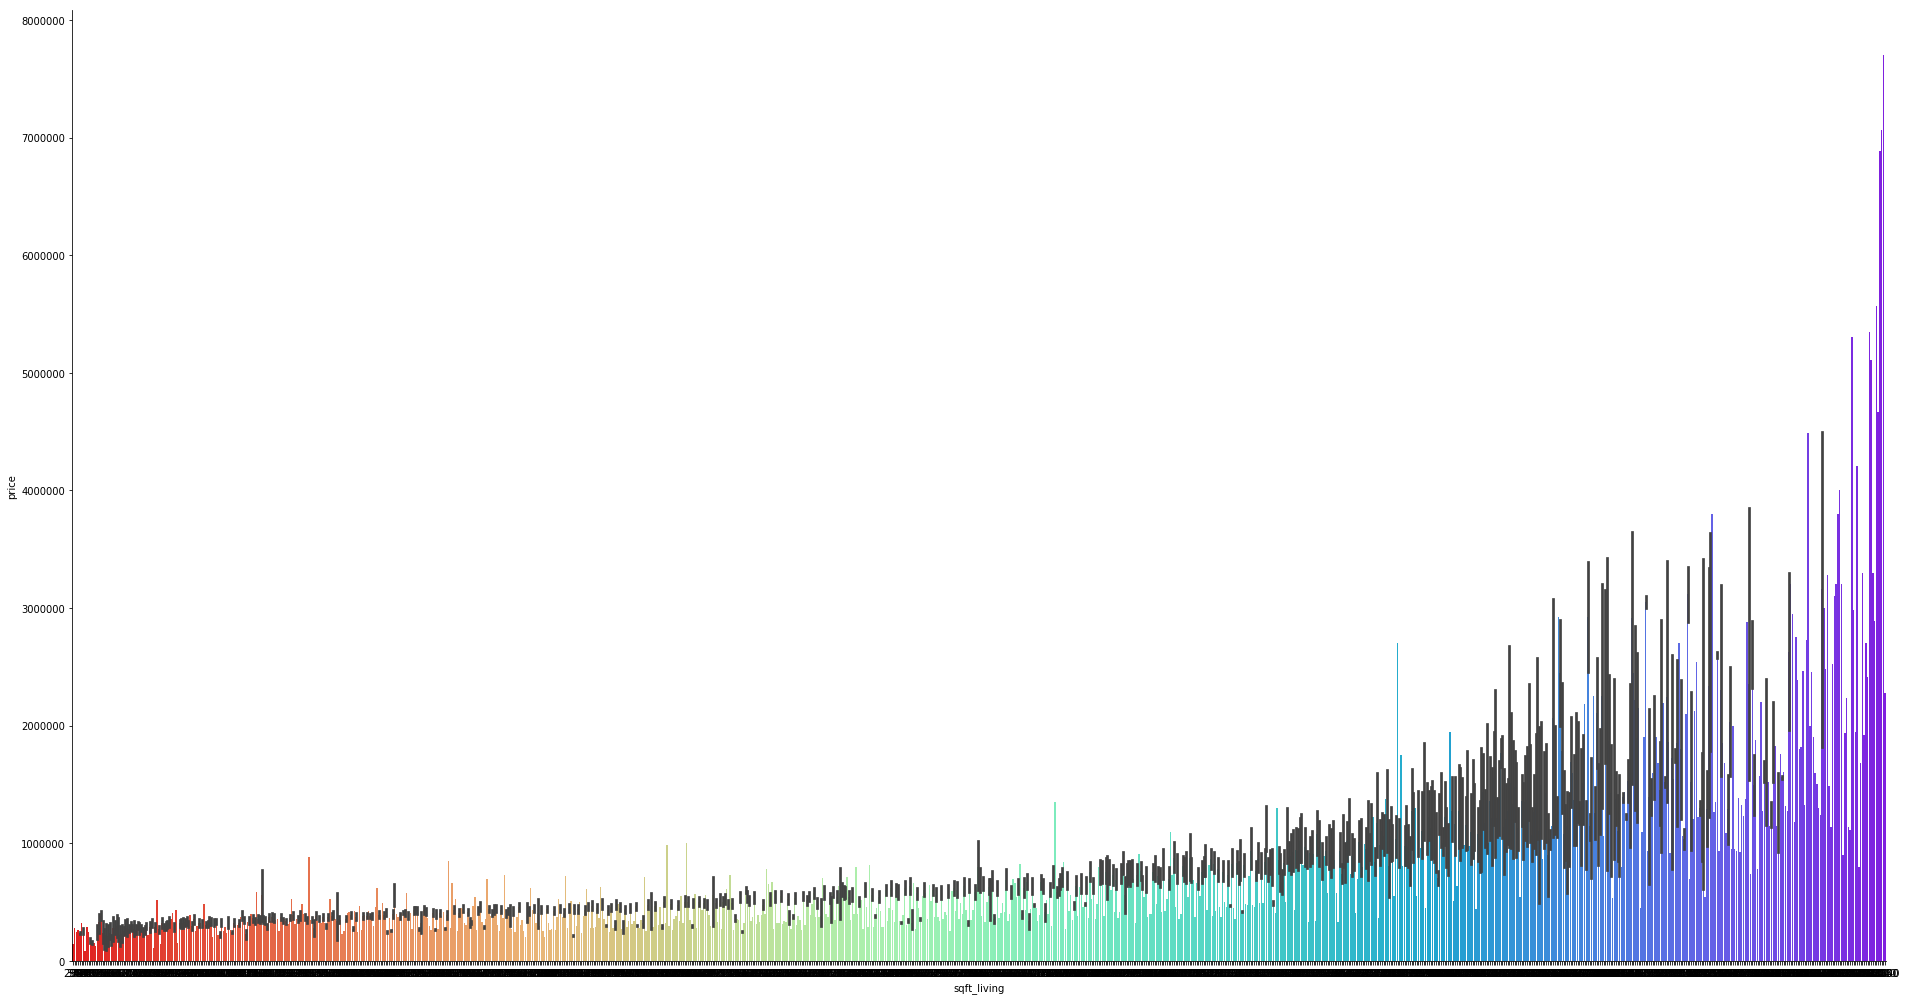

In [42]:
sns.factorplot(x="sqft_living", y="price", data = housedf, kind="bar", size=14, aspect=1.9, palette='rainbow_r')

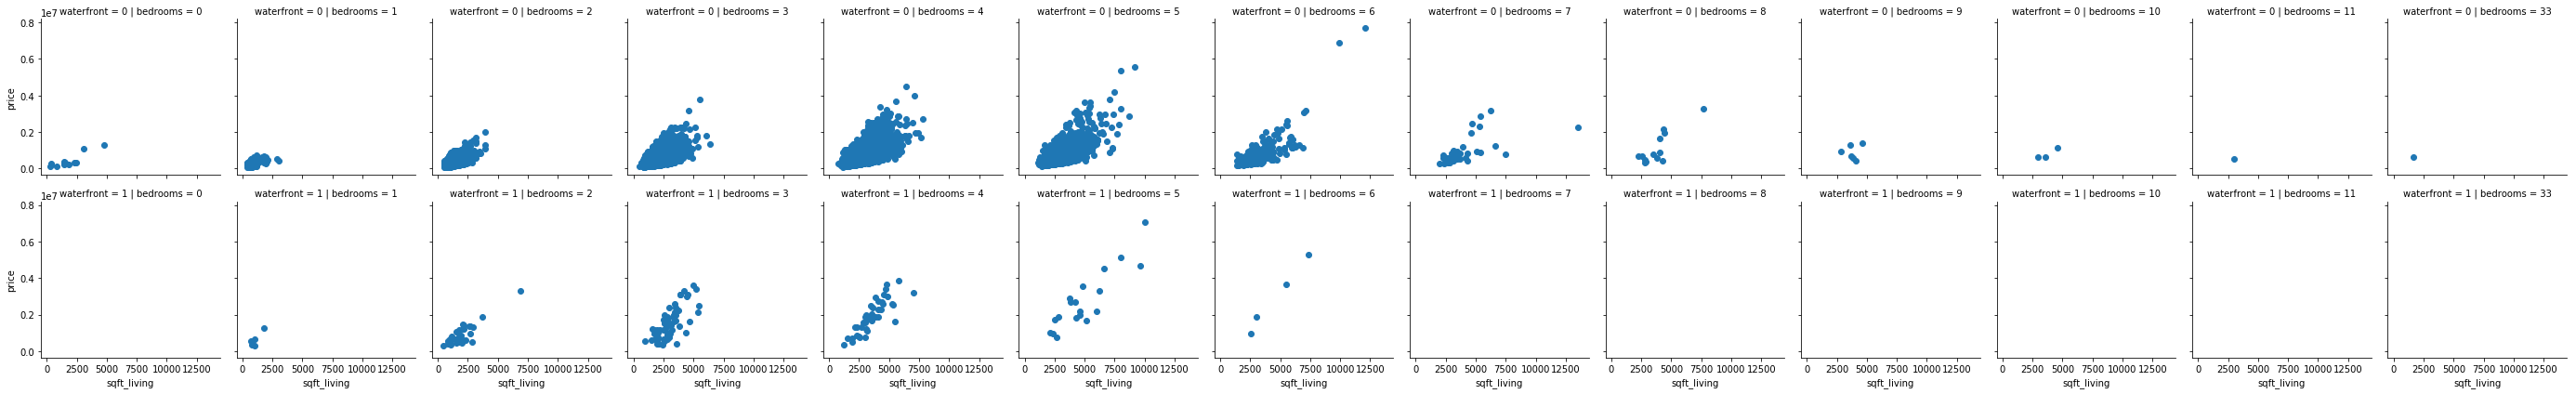

In [43]:
# to see the multiple features relationship at the same time
g = sns.FacetGrid(housedf, row='waterfront',col="bedrooms") 
g.map(plt.scatter, 'sqft_living',"price")

from the plot I realize that house's price increase when houses have 7 bedroom, do not have view to a waterfront and when sqft_living is big.

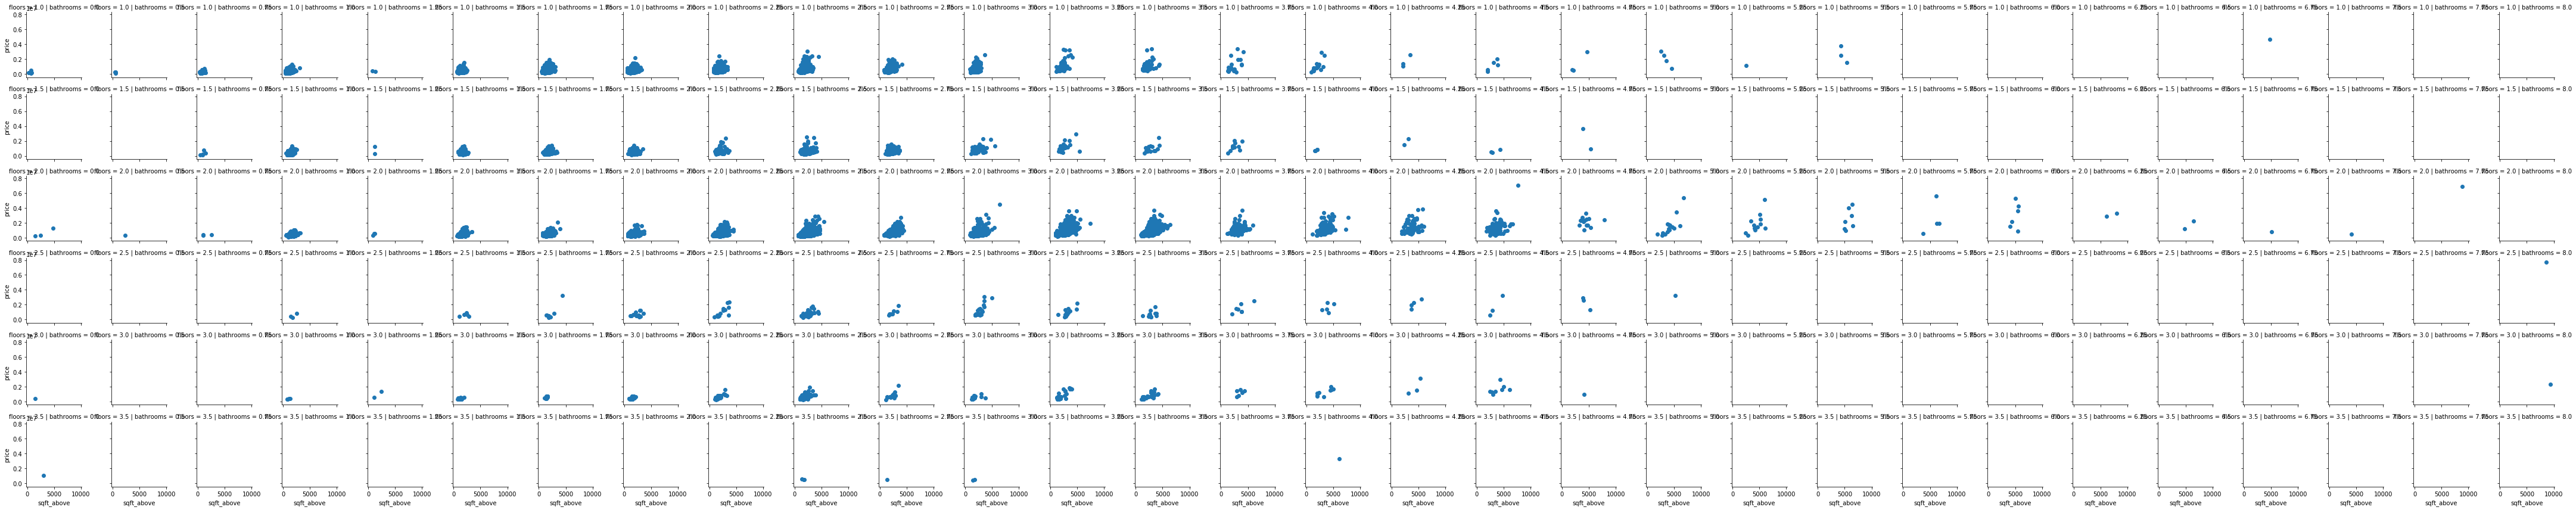

In [44]:
# to see the multiple features relationship at the same time
g = sns.FacetGrid(housedf, row='floors',col="bathrooms", height=2) 
g.map(plt.scatter, 'sqft_above',"price")

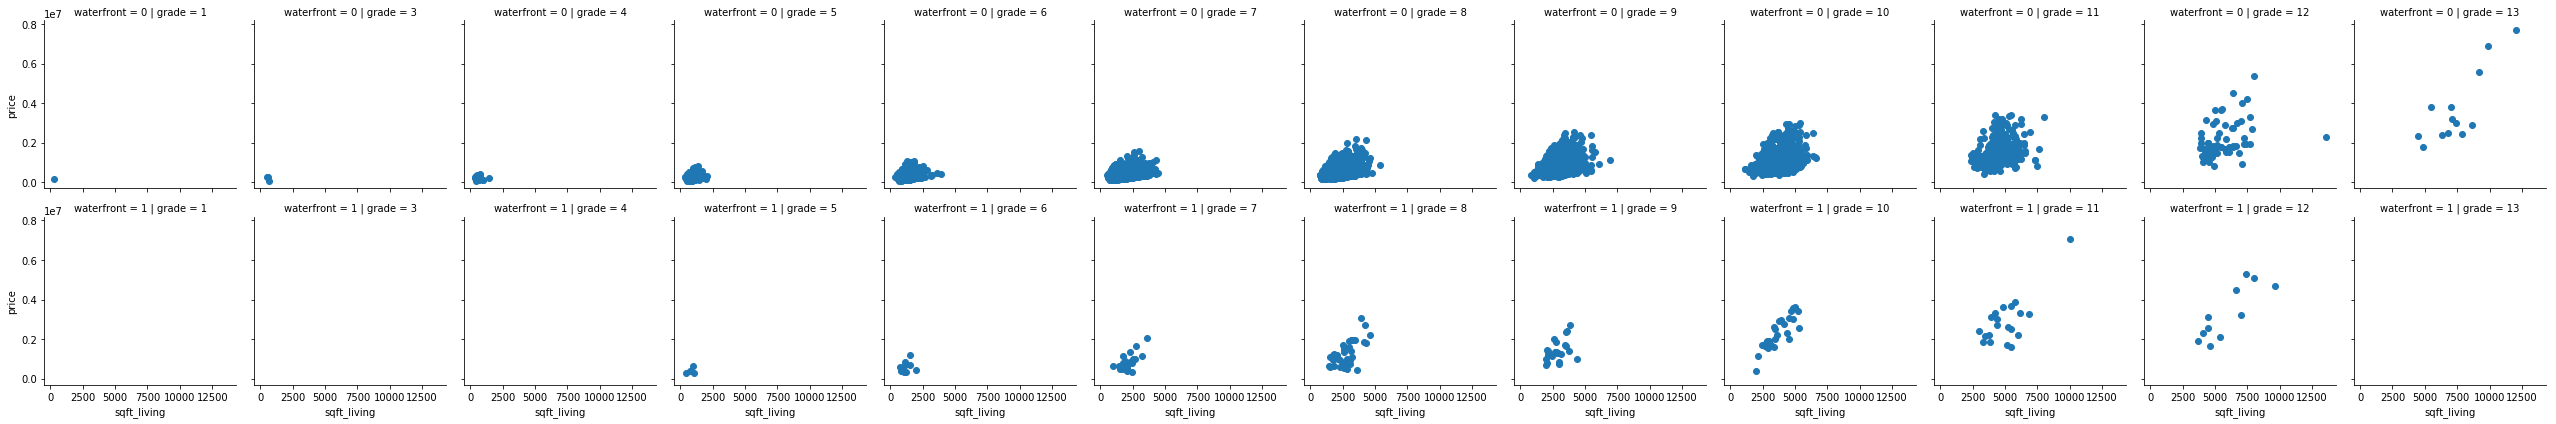

In [45]:
g = sns.FacetGrid(housedf, row="waterfront",col='grade') 
g.map(plt.scatter, 'sqft_living',"price")

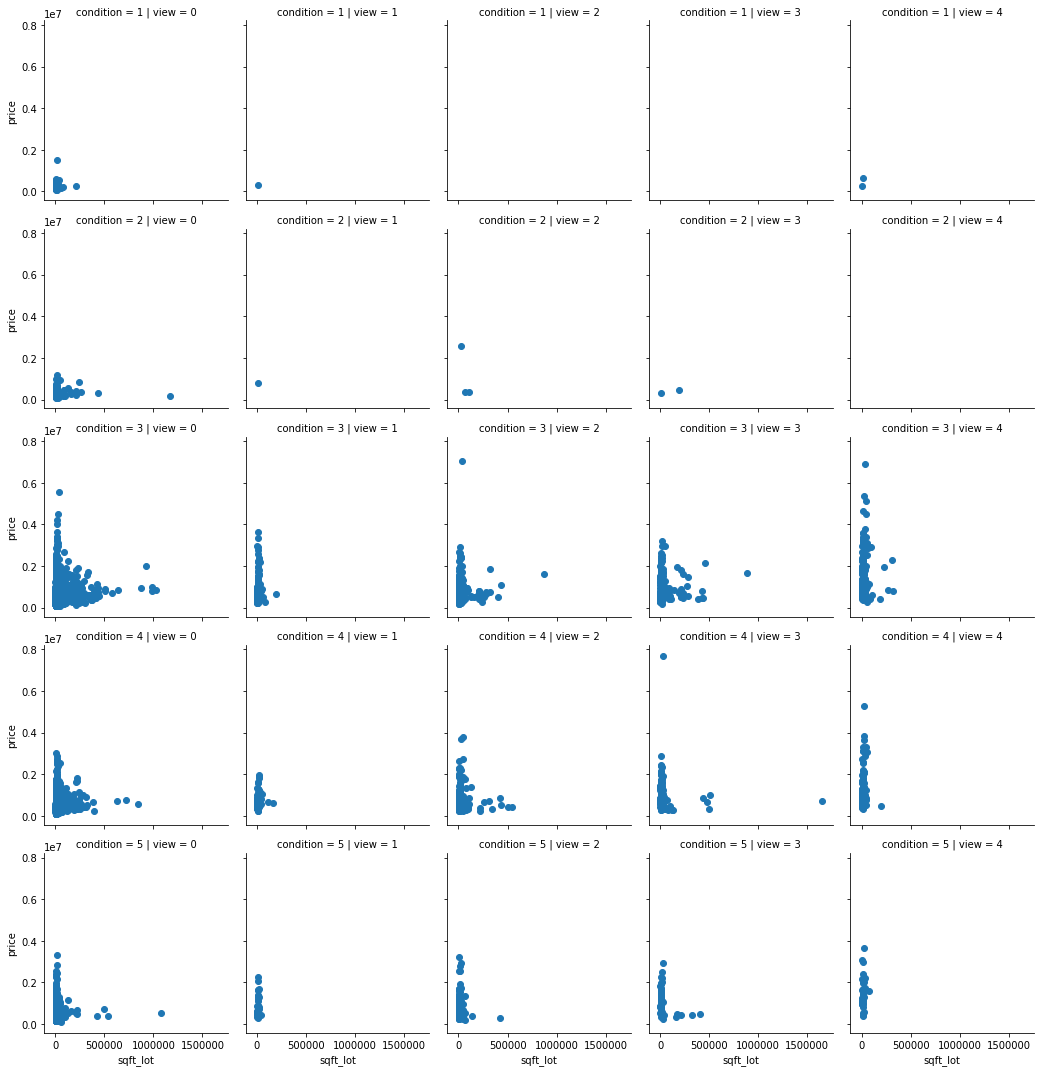

In [46]:
g = sns.FacetGrid(housedf, col="view",row='condition') 
g.map(plt.scatter,'sqft_lot', "price")

I noted that price and sqft_lot do not have correlation with each other. House's price increased when condition was 3, and viewed for 4 times. 

C:\Users\heyda\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\heyda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


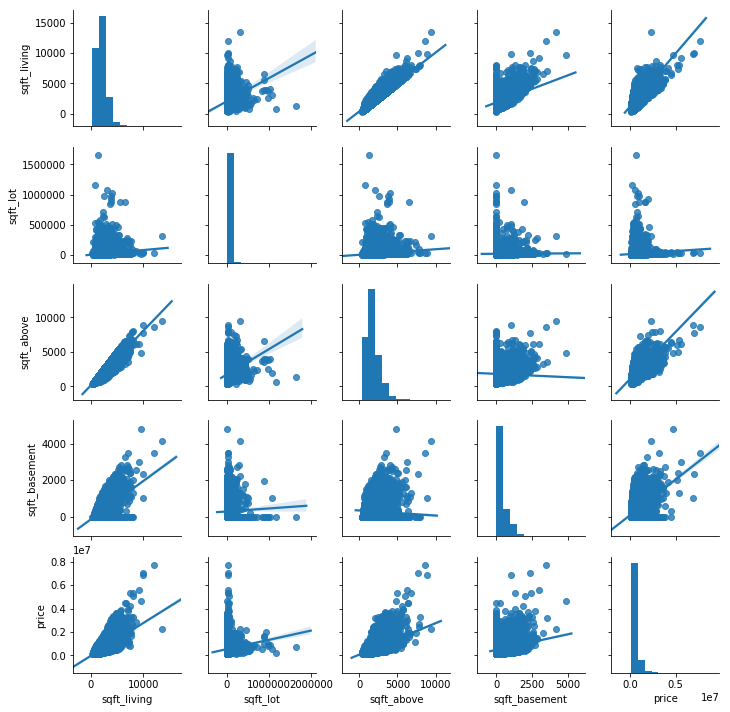

In [47]:
#use pairplot to see relationship between the numerical features using the regression line
g = sns.pairplot(housedf[['sqft_living','sqft_lot','sqft_above','sqft_basement','price']], palette='tab20',kind='reg',size=2)

There is very high correlation between sqft_living and sqft_above. I also noted good correlation between sqft_living and price.

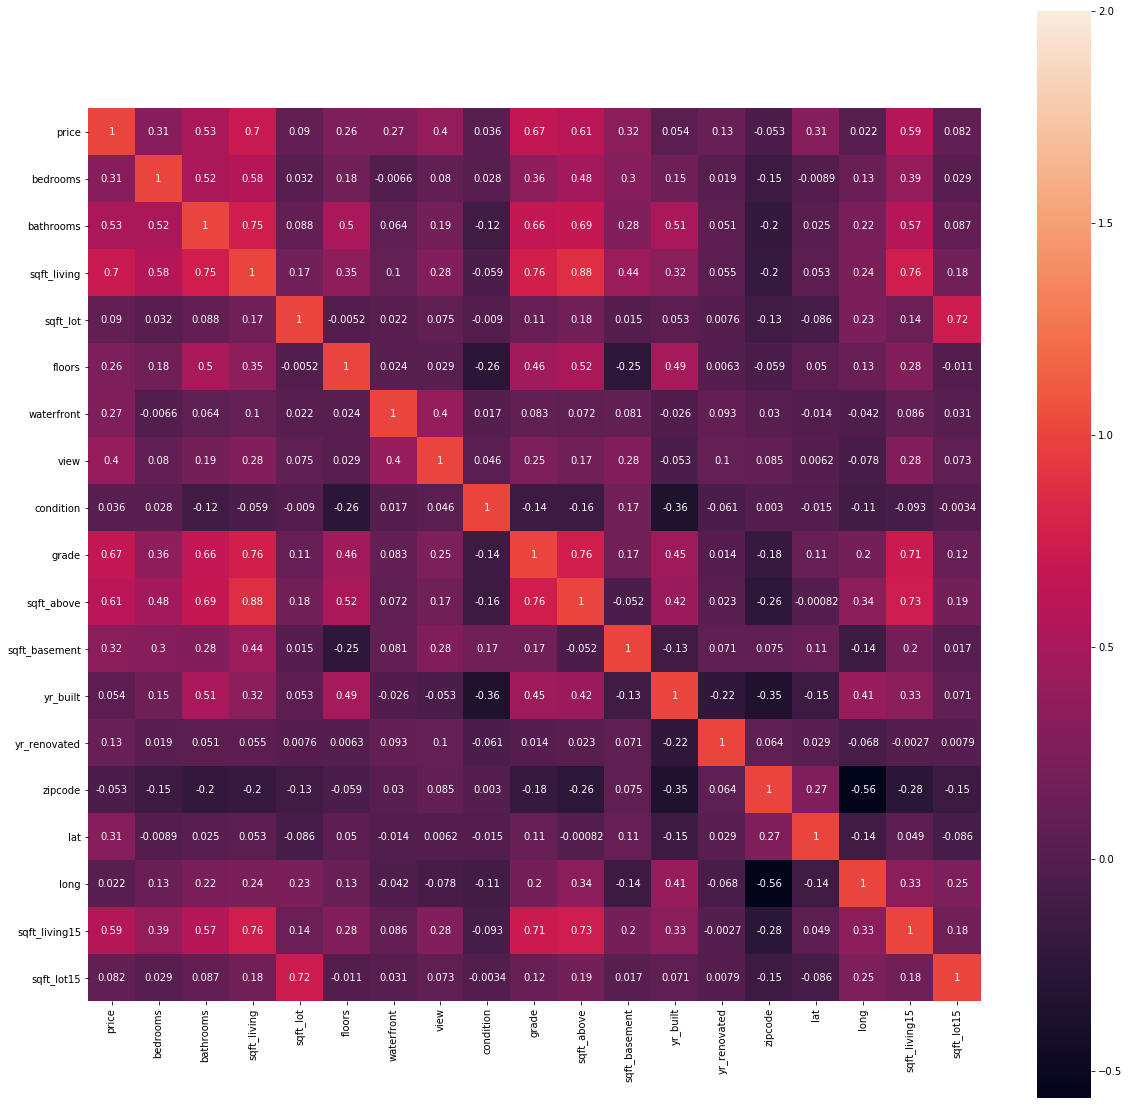

In [48]:
#using the heat map to see the correlation between the features
corrMat = housedf.corr()
ig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrMat,  square=True,vmax=2, annot=True, ax=ax)
plt.show()

In [49]:
#Drop the sqft_living because of the high correlation between sqft_lot and price
housedf.drop(columns=['sqft_above'],axis=1, inplace=True)

In [50]:
housedf.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [51]:
#put the different scaled features into same scale and create new object
from sklearn import preprocessing

column_names_to_normalize = ['price', 'sqft_lot','sqft_living','sqft_basement','lat','long','sqft_lot15','sqft_living15']
x = housedf[column_names_to_normalize].values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scales_columns = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = housedf.index)

In [52]:
df_scales_columns.head()

,price,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15
0,-0.866717,-0.228321,-0.979835,-0.658681,-0.352572,-0.306079,-0.260715,-0.943355
1,-0.005688,-0.189885,0.533634,0.245141,1.161568,-0.746341,-0.187868,-0.432686
2,-0.980849,-0.123298,-1.426254,-0.658681,1.283537,-0.135655,-0.172375,1.070140
3,0.174090,-0.244014,-0.130550,1.397515,-0.283288,-1.271816,-0.284522,-0.914174
4,-0.081958,-0.169653,-0.435422,-0.658681,0.409550,1.199335,-0.192849,-0.272190


In [53]:
df_scales_columns.describe()

,price,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.833746e-16,3.281921e-17,3.174253e-16,-2.022801e-15,-3.446807e-14,-3.637898e-14,1.235382e-16,-1.506632e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.266860e+00,-3.521759e-01,-1.948891e+00,-6.586810e-01,-2.916795e+00,-2.166543e+00,-4.438052e-01,-2.316325e+00
25%,-5.941897e-01,-2.430487e-01,-7.108948e-01,-6.586810e-01,-6.426977e-01,-8.102505e-01,-2.808593e-01,-7.244971e-01
50%,-2.453924e-01,-1.808075e-01,-1.849914e-01,-6.586810e-01,8.478232e-02,-1.143518e-01,-1.885636e-01,-2.138280e-01
75%,2.857709e-01,-1.066880e-01,5.118578e-01,6.066704e-01,8.512345e-01,6.312541e-01,-9.835556e-02,5.448802e-01
max,1.950299e+01,3.950434e+01,1.247807e+01,1.023238e+01,1.570054e+00,6.383070e+00,3.144029e+01,6.162239e+00


In [54]:
df_scales_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
price            21613 non-null float64
sqft_lot         21613 non-null float64
sqft_living      21613 non-null float64
sqft_basement    21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_lot15       21613 non-null float64
sqft_living15    21613 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [55]:
#drop the scaled features from original dataset
housedf.drop(columns=['price', 'sqft_lot','sqft_living','sqft_basement','lat','long','sqft_lot15','sqft_living15'],axis=1, inplace=True)

In [56]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
bedrooms        21613 non-null int64
bathrooms       21613 non-null float64
floors          21613 non-null float64
waterfront      21613 non-null int64
view            21613 non-null int64
condition       21613 non-null int64
grade           21613 non-null int64
yr_built        21613 non-null int64
yr_renovated    21613 non-null int64
zipcode         21613 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.6 MB


In [57]:
#concatenate new object to existing dataset
newdf = pd.concat([df_scales_columns, housedf], axis=1)


In [58]:
newdf.head()

,price,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,-0.866717,-0.228321,-0.979835,-0.658681,-0.352572,-0.306079,-0.260715,-0.943355,3,1.00,1.0,0,0,3,7,1955,0,98178
1,-0.005688,-0.189885,0.533634,0.245141,1.161568,-0.746341,-0.187868,-0.432686,3,2.25,2.0,0,0,3,7,1951,1991,98125
2,-0.980849,-0.123298,-1.426254,-0.658681,1.283537,-0.135655,-0.172375,1.070140,2,1.00,1.0,0,0,3,6,1933,0,98028
3,0.174090,-0.244014,-0.130550,1.397515,-0.283288,-1.271816,-0.284522,-0.914174,4,3.00,1.0,0,0,5,7,1965,0,98136
4,-0.081958,-0.169653,-0.435422,-0.658681,0.409550,1.199335,-0.192849,-0.272190,3,2.00,1.0,0,0,3,8,1987,0,98074


now we have new dataset with scaled features

In [59]:
newdf.describe()

,price,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,-1.833746e-16,3.281921e-17,3.174253e-16,-2.022801e-15,-3.446807e-14,-3.637898e-14,1.235382e-16,-1.506632e-16,3.370842,2.114757,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.930062,0.770163,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026
min,-1.266860e+00,-3.521759e-01,-1.948891e+00,-6.586810e-01,-2.916795e+00,-2.166543e+00,-4.438052e-01,-2.316325e+00,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000
25%,-5.941897e-01,-2.430487e-01,-7.108948e-01,-6.586810e-01,-6.426977e-01,-8.102505e-01,-2.808593e-01,-7.244971e-01,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000
50%,-2.453924e-01,-1.808075e-01,-1.849914e-01,-6.586810e-01,8.478232e-02,-1.143518e-01,-1.885636e-01,-2.138280e-01,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000
75%,2.857709e-01,-1.066880e-01,5.118578e-01,6.066704e-01,8.512345e-01,6.312541e-01,-9.835556e-02,5.448802e-01,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000
max,1.950299e+01,3.950434e+01,1.247807e+01,1.023238e+01,1.570054e+00,6.383070e+00,3.144029e+01,6.162239e+00,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000


In [60]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
sqft_lot         21613 non-null float64
sqft_living      21613 non-null float64
sqft_basement    21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_lot15       21613 non-null float64
sqft_living15    21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
dtypes: float64(10), int64(8)
memory usage: 3.0 MB


In [61]:
#dummy the categorical variables
newDF=pd.get_dummies(newdf, columns=["waterfront", "view",'condition','grade'], prefix=["waterfront", "view",'condition','grade'])
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 38 columns):
price            21613 non-null float64
sqft_lot         21613 non-null float64
sqft_living      21613 non-null float64
sqft_basement    21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_lot15       21613 non-null float64
sqft_living15    21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
floors           21613 non-null float64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
waterfront_0     21613 non-null uint8
waterfront_1     21613 non-null uint8
view_0           21613 non-null uint8
view_1           21613 non-null uint8
view_2           21613 non-null uint8
view_3           21613 non-null uint8
view_4           21613 non-null uint8
condition_1      21613 non-null uint8
condition_2      21613 non-null uin

In [62]:
newDF.head()

,price,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15,bedrooms,bathrooms,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.866717,-0.228321,-0.979835,-0.658681,-0.352572,-0.306079,-0.260715,-0.943355,3,1.00,...,0,0,0,1,0,0,0,0,0,0
1,-0.005688,-0.189885,0.533634,0.245141,1.161568,-0.746341,-0.187868,-0.432686,3,2.25,...,0,0,0,1,0,0,0,0,0,0
2,-0.980849,-0.123298,-1.426254,-0.658681,1.283537,-0.135655,-0.172375,1.070140,2,1.00,...,0,0,1,0,0,0,0,0,0,0
3,0.174090,-0.244014,-0.130550,1.397515,-0.283288,-1.271816,-0.284522,-0.914174,4,3.00,...,0,0,0,1,0,0,0,0,0,0
4,-0.081958,-0.169653,-0.435422,-0.658681,0.409550,1.199335,-0.192849,-0.272190,3,2.00,...,0,0,0,0,1,0,0,0,0,0


descritization increased the features size from 18 to 38

In [63]:
newDF.isnull().values.any()

False

In [64]:
#define the features(x_values)
features=newDF.iloc[:,1:38]
print('Summary of feature sample')
features.head(7)

Summary of feature sample


,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15,bedrooms,bathrooms,floors,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.228321,-0.979835,-0.658681,-0.352572,-0.306079,-0.260715,-0.943355,3,1.00,1.0,...,0,0,0,1,0,0,0,0,0,0
1,-0.189885,0.533634,0.245141,1.161568,-0.746341,-0.187868,-0.432686,3,2.25,2.0,...,0,0,0,1,0,0,0,0,0,0
2,-0.123298,-1.426254,-0.658681,1.283537,-0.135655,-0.172375,1.070140,2,1.00,1.0,...,0,0,1,0,0,0,0,0,0,0
3,-0.244014,-0.130550,1.397515,-0.283288,-1.271816,-0.284522,-0.914174,4,3.00,1.0,...,0,0,0,1,0,0,0,0,0,0
4,-0.169653,-0.435422,-0.658681,0.409550,1.199335,-0.192849,-0.272190,3,2.00,1.0,...,0,0,0,0,1,0,0,0,0,0
5,2.096185,3.636791,2.798440,0.693181,1.483375,3.265566,4.046611,4,4.50,1.0,...,0,0,0,0,0,0,0,1,0,0
6,-0.200098,-0.397313,-0.658681,-1.806810,-0.803149,-0.217900,0.366876,3,2.25,2.0,...,0,0,0,1,0,0,0,0,0,0


In [65]:
#define the dependent variable(y_value)
depVar = newDF.iloc[:,0]
print('Summary of dependent sample')
depVar.head()

Summary of dependent sample


0   -0.866717
1   -0.005688
2   -0.980849
3    0.174090
4   -0.081958
Name: price, dtype: float64

In [66]:
#Training Set (Feature Space: X Training)
X_train=features[:15130]
X_train_count=len(X_train.index)
X_train.head()

,sqft_lot,sqft_living,sqft_basement,lat,long,sqft_lot15,sqft_living15,bedrooms,bathrooms,floors,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.228321,-0.979835,-0.658681,-0.352572,-0.306079,-0.260715,-0.943355,3,1.00,1.0,...,0,0,0,1,0,0,0,0,0,0
1,-0.189885,0.533634,0.245141,1.161568,-0.746341,-0.187868,-0.432686,3,2.25,2.0,...,0,0,0,1,0,0,0,0,0,0
2,-0.123298,-1.426254,-0.658681,1.283537,-0.135655,-0.172375,1.070140,2,1.00,1.0,...,0,0,1,0,0,0,0,0,0,0
3,-0.244014,-0.130550,1.397515,-0.283288,-1.271816,-0.284522,-0.914174,4,3.00,1.0,...,0,0,0,1,0,0,0,0,0,0
4,-0.169653,-0.435422,-0.658681,0.409550,1.199335,-0.192849,-0.272190,3,2.00,1.0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
#Dependent Variable Training Set (y Training)
y_train = depVar[:15130]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 15130


0   -0.866717
1   -0.005688
2   -0.980849
3    0.174090
4   -0.081958
Name: price, dtype: float64

In [68]:
#Testing Set (X Testing)
X_test = features[-6482:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 6482
       sqft_lot  sqft_living  sqft_basement       lat      long  sqft_lot15  \
15131 -0.292301    -1.350036      -0.658681 -0.476705 -0.433897   -0.247897   
15132 -0.172526     0.969165       1.487897  1.095171 -0.540412   -0.176148   
15133 -0.183656    -1.404478      -0.658681  1.474789  0.112880   -0.139119   
15134  0.516713     0.065439      -0.658681 -2.116422 -0.270574   -0.028145   
15135 -0.012167     0.544523      -0.658681  0.431923  0.013466    0.057815   

       sqft_living15  bedrooms  bathrooms  floors    ...     grade_4  grade_5  \
15131      -1.424843         3        1.0     1.0    ...           0        1   
15132      -0.841221         4        2.5     1.0    ...           0        0   
15133      -0.024151         2        1.0     1.0    ...           0        0   
15134      -0.403505         6        1.5     1.5    ...           0        0   
15135       0.617833         3        2.5     1.0    ... 

In [69]:
#Dependent Variable Testing Set (y Training)
y_test = depVar[-6482:]
y_test_count = len(y_test.index)
print('The number of observations in the Y testing set are:',str(y_test_count))
y_test.head()

The number of observations in the Y testing set are: 6482


15131   -1.103426
15132    0.258532
15133   -0.802433
15134   -0.844654
15135    3.350175
Name: price, dtype: float64

In [70]:
#apply cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [71]:
#create the objects for models and define the parameters
modelSVR = SVR(kernel='linear', C=1, gamma=1)
modelRF = RandomForestRegressor(n_estimators = 100, max_features='auto', random_state = 40)
modelLR = LinearRegression(n_jobs=8)
modelKNN= neighbors.KNeighborsRegressor(n_neighbors=5,weights='uniform')

In [72]:
#train the Random Forest
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [73]:
#get the training score
print(cross_val_score(modelRF, X_train, y_train))
scoreRF=modelRF.score(X_train,y_train)
print('R Squared: %.3f' % scoreRF)



[0.81950298 0.86054955 0.86530466]
R Squared: 0.979


In [74]:
#Make Predictions
predictionsRF = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictionsRF)
rmse = sqrt(mean_squared_error(y_test, predictionsRF))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.836
RMSE: 0.367


In [75]:
#train the KNN
modelKNN.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [76]:
#get the training score
print(cross_val_score(modelKNN, X_train, y_train))
score_KNN = modelKNN.score(X_train,y_train)
print('R Squared: %.3f' % score_KNN)


[0.49757224 0.54144191 0.53944372]
R Squared: 0.726


In [77]:
#Make Predictions
predictionKNN = modelKNN.predict(X_test)
predRsquared = r2_score(y_test,predictionKNN)
rmse = sqrt(mean_squared_error(y_test, predictionKNN))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.595
RMSE: 0.577


In [78]:
#train the Linear Regression
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [79]:
#get the training score
print(cross_val_score(modelLR, X_train, y_train))
scoreLR=modelLR.score(X_train,y_train)
print('R squared: %.3f' % scoreLR)

[0.72960981 0.73556011 0.72365564]
R squared: 0.736


In [80]:
#Make Predictions
predictionLR = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictionLR)
rmse = sqrt(mean_squared_error(y_test, predictionLR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.705
RMSE: 0.492


In [ ]:
#train the SVR
modelSVR.fit(X_train,y_train)
#get the training score
print(cross_val_score(modelSVR, X_train, y_train))
scoreSVR=modelSVR.score(X_train,y_train)
print('R squared: %.3f' % scoreSVR)

In [ ]:
#Make Predictions
predictionSVR = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictionSVR)
rmse = sqrt(mean_squared_error(y_test, predictionSVR))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

Running SVR was very time consuming thus I did not prefer to work with this model

In [81]:
#find the features importance in dataset
importance=modelRF.feature_importances_

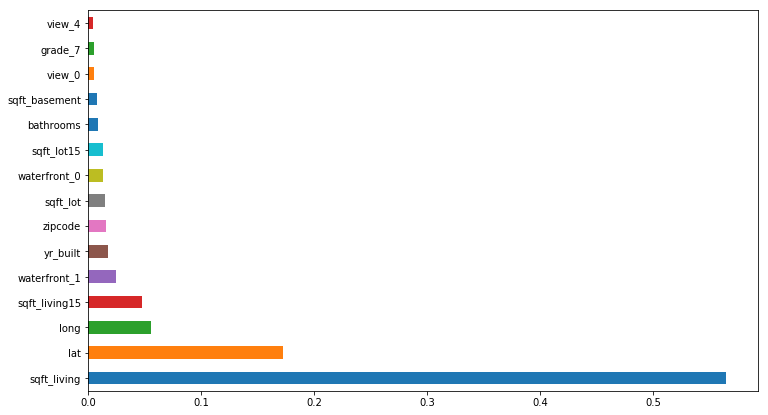

In [82]:
feat_importances = pd.Series(modelRF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(12,7))
plt.show()

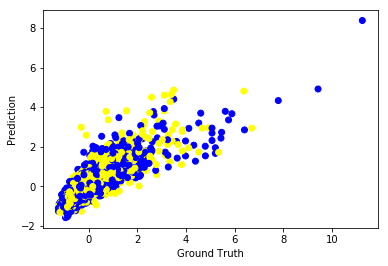

In [83]:
#evaluate the prediction with ground trust
plt.scatter(y_test, predictionLR, color=['blue','yellow'])
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()

In [84]:
# Create a selector object that will use the Linear regression to identify
#features that have an importance of more than median number
from sklearn.feature_selection import SelectFromModel
select=SelectFromModel(LinearRegression(n_jobs=8),threshold='median')
select.fit(X_train,y_train)


SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
        norm_order=1, prefit=False, threshold='median')

In [85]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_train_s = select.transform(X_train)
X_test_s= select.transform(X_test)
print('The shape of X_train is:',X_train.shape)
print('The shape of X_train_s is:',X_train_s.shape)
print('The shape of X_test is:',X_train.shape)
print('The shape of X_test_s is:',X_test_s.shape)

The shape of X_train is: (11347, 37)
The shape of X_train_s is: (11347, 19)
The shape of X_test is: (11347, 37)
The shape of X_test_s is: (3783, 19)


In [86]:
# Create a new Linear Regression classifier for the most important features
modelLR_important = LinearRegression(n_jobs=8)

# Train the new classifier on the new dataset containing the most important features
modelLR_important.fit(X_train_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [87]:
#get the training score
print(cross_val_score(modelLR_important, X_train_s, y_train))
accuracy_important = modelLR_important.score(X_train_s,y_train)
print('R squared of Linear Regression with important features is:',str(accuracy_important))

[0.69249342 0.69868696 0.68291952]
R squared of Linear Regression with important features is: 0.6979760317176602


In [88]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = modelLR_important.predict(X_test_s)

# View The Accuracy Of Our Limited Feature (2 Features) Model
sqrt(mean_squared_error(y_test, y_important_pred))

0.5178105807728508

Accuracy decreased when we used the only important features for the prediction.

In [89]:
#used PCA as dimensionality reduction 
pca = PCA(n_components=7) 
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [90]:
# Create a new Linear Regression classifier for the PCA
modelLR_pca = LinearRegression(n_jobs=8)

# Train the new classifier on the new dataset containing the most important features
modelLR_pca.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [91]:
#get the training score
print(cross_val_score(modelLR_pca, X_train_pca, y_train))
accuracy_important = modelLR_pca.score(X_train_pca,y_train)
print('R squared of Linear Regression with PCA is:',str(accuracy_important))

[0.54391227 0.56328742 0.53598708]
R squared of Linear Regression with PCA is: 0.5510832610591818
